# CAPM - Capital Asset Pricing Model 

Watch the video for the full overview.

Portfolio Returns:

## $r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$

Market Weights:

## $ w_i = \frac{MarketCap_i}{\sum_{j}^{n}{MarketCap_j}} $


### CAPM of a portfolio


## $ r_p(t) = \beta_pr_m(t) + \sum\limits_{i}^{n}w_i \alpha_i(t)$

In [1]:
# Model CAPM as a simple linear regression

In [2]:
from scipy import stats

In [3]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.  In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, 

In [4]:
import pandas as pd

In [5]:
import pandas_datareader as web

C:\Users\natha\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [7]:
spy_etf = web.DataReader('SPY','yahoo')

In [8]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-05-13 to 2020-05-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1258 non-null   float64
 1   Low        1258 non-null   float64
 2   Open       1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   float64
 5   Adj Close  1258 non-null   float64
dtypes: float64(6)
memory usage: 68.8 KB


In [9]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-05-13,211.220001,209.740005,210.470001,210.020004,94667900.0,190.050766
2015-05-14,212.320007,210.910004,211.240005,212.210007,95934000.0,192.032532
2015-05-15,212.610001,211.860001,212.440002,212.440002,76510100.0,192.240662
2015-05-18,213.399994,212.160004,212.240005,213.100006,74549700.0,192.837921
2015-05-19,213.570007,212.690002,213.240005,213.029999,72114600.0,192.774567


In [10]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2017-07-18')

In [17]:
aapl = web.DataReader('AAPL','yahoo')

In [18]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-05-13,127.190002,125.870003,126.150002,126.010002,34694200.0,116.131927
2015-05-14,128.949997,127.160004,127.410004,128.949997,45203500.0,118.841446
2015-05-15,129.490005,128.210007,129.070007,128.770004,38208000.0,118.675552
2015-05-18,130.720001,128.360001,128.380005,130.190002,50882900.0,119.984222
2015-05-19,130.880005,129.639999,130.690002,130.070007,44633200.0,119.873642


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

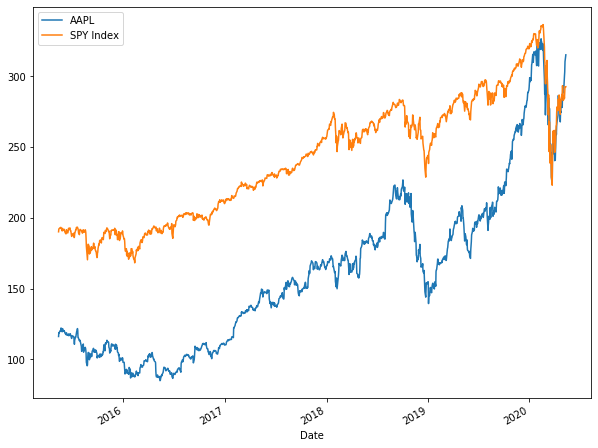

In [23]:
aapl['Adj Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Adj Close'].plot(label='SPY Index')
plt.legend()

## Compare Cumulative Return

In [24]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

Text(0.5, 1.0, 'Cumulative Return')

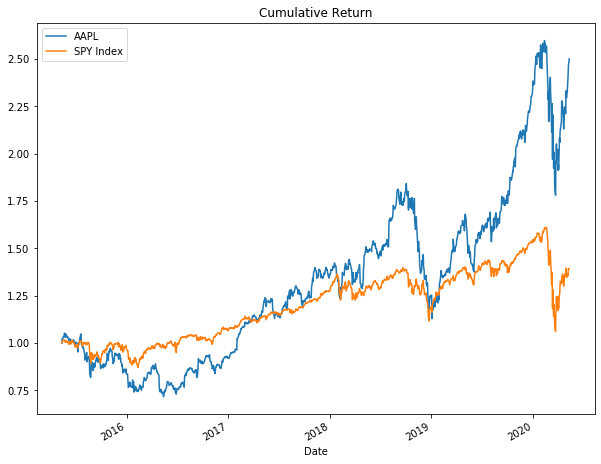

In [25]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return')

## Get Daily Return

In [30]:
aapl['Daily Return'] = aapl['Adj Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Adj Close'].pct_change(1)

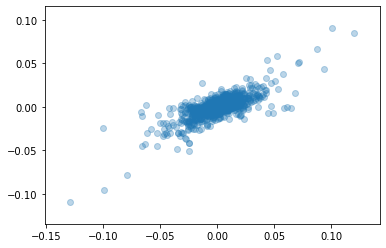

In [31]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.3)

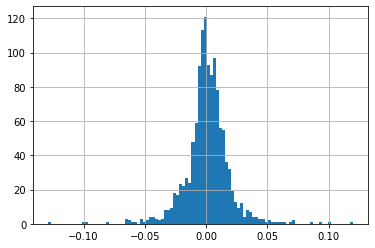

In [32]:
aapl['Daily Return'].hist(bins=100)

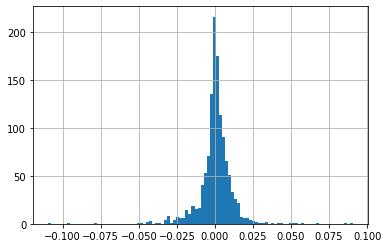

In [33]:
spy_etf['Daily Return'].hist(bins=100)

In [34]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [35]:
beta

0.49546933197047177

In [36]:
alpha

-6.276000274593215e-05

In [37]:
r_value

0.7656603659858482

## What if our stock was completely related to SP500?

In [38]:
spy_etf['Daily Return'].head()

Date
2015-05-13         NaN
2015-05-14    0.010428
2015-05-15    0.001084
2015-05-18    0.003107
2015-05-19   -0.000329
Name: Daily Return, dtype: float64

In [39]:
import numpy as np

In [40]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [41]:
noise

array([-7.06985519e-04,  6.85389087e-05, -1.51787216e-03, ...,
        1.17085777e-06, -1.42451718e-03, -3.13333744e-05])

In [47]:
fs =spy_etf['Daily Return'].iloc[1:] + noise

In [43]:
beta,alpha,r_value,p_value,std_err = stats.linregress(spy_etf['Daily Return'].iloc[1:]+noise,spy_etf['Daily Return'].iloc[1:])

In [44]:
beta

0.9939708722270254

In [46]:
alpha

-2.049983370868574e-05

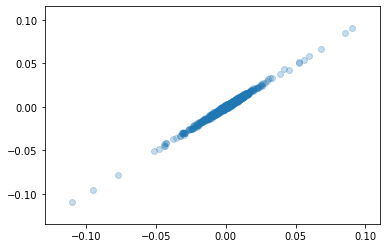

In [49]:
plt.scatter(fs,spy_etf['Daily Return'].iloc[1:],alpha=0.25)

Looks like our understanding is correct!